Dataset Preview:
   AGE     SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59  Female  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    Male  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72  Female  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    Male  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    Male  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135
Dataset Shape: (442, 11)

=== Task 1: Single Feature Linear Regression ===
Best Feature: BMI
Slope: 10.2331
Y-Intercept: -117.7734
MSE: 3890.4566


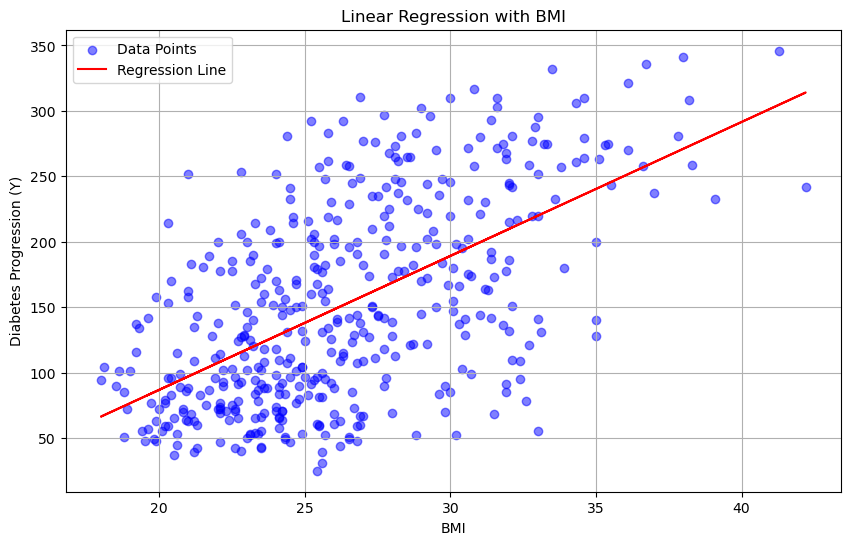


=== Task 2: Pair of Features Linear Regression ===
Best Feature Pair: ('BMI', 'S5')
Slopes: 7.2760, 56.0564
Y-Intercept: -299.9575
MSE: 3205.1901


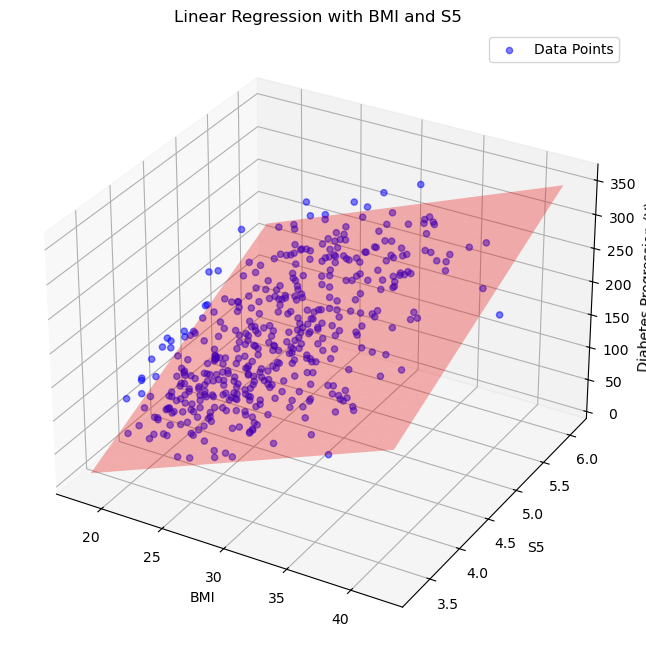


=== Task 3: All Features Linear Regression ===
Coefficients:
AGE: -0.1205
BMI: 6.0041
BP: 0.9505
S1: -0.9808
S2: 0.6585
S3: 0.5136
S4: 4.6599
S5: 68.9473
S6: 0.2026
Y-Intercept: -363.8987
MSE: 2961.5034

=== Task 4: Training and Validation MSE (Linear Regression) ===
   Train Size  Training MSE  Validation MSE
0          20   2071.396871    15344.665180
1          50   2881.091894     3973.134174
2         100   3157.711870     3517.523414
3         200   2962.978233     3094.930263

=== XGBoost Model ===
XGBoost Task 1: Single Feature (BMI)
MSE with BMI: 2488.5031


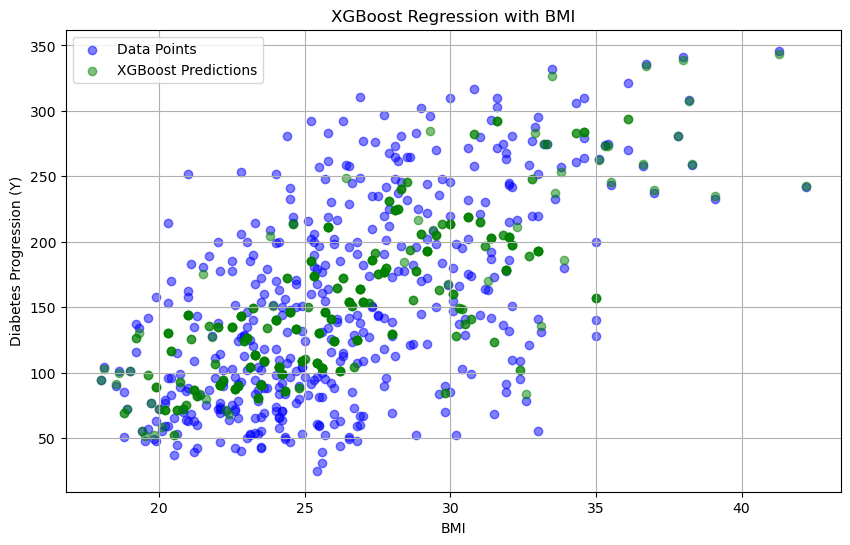

XGBoost Task 2: Pair of Features (BMI, S5)
MSE with BMI and S5: 94.7829
XGBoost Task 3: All Features
MSE with All Features: 0.2018
XGBoost Task 4: Training and Validation MSE
   Train Size  Training MSE  Validation MSE
0          20  4.301924e-07     5962.262939
1          50  5.954405e-07     5326.494841
2         100  5.821069e-07     4135.956378
3         200  6.241412e-05     4136.972751

=== Comparison: Linear Regression vs. XGBoost ===
Task 1 MSE: Linear Regression (BMI) = 3890.456585461273 vs. XGBoost = 2488.5030985132685
Task 2 MSE: Linear Regression (BMI, S5) = 3205.190076824854 vs. XGBoost = 94.7828803580015
Task 3 MSE: Linear Regression (All) = 2961.503376648679 vs. XGBoost = 0.2018131157357396
Task 4 Validation MSE (Average):
Linear Regression: 6482.563257682071
XGBoost: 4890.421727299313


In [27]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from itertools import combinations
import seaborn as sns
import xgboost as xgb

# Set random seed
np.random.seed(42)

# Load the dataset
file_path = r"C:\Users\jariw\Progression Of Diabetes\diabetes.data.txt"
data = pd.read_csv(file_path, sep=r'\s+', header=0)
data['SEX'] = data['SEX'].map({1: 'Male', 2: 'Female'})
print("Dataset Preview:")
print(data.head())
print(f"Dataset Shape: {data.shape}")

# Define features and target
X = data[['AGE', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']]
y = data['Y']

# Task 1: Single Feature
print("\n=== Task 1: Single Feature Linear Regression ===")
best_mse = float('inf')
best_feature = None
best_slope = None
best_intercept = None
best_predictions = None

for feature in X.columns:
    X_single = X[[feature]]
    model = LinearRegression()
    model.fit(X_single, y)
    y_pred = model.predict(X_single)
    mse = mean_squared_error(y, y_pred)
    
    if mse < best_mse:
        best_mse = mse
        best_feature = feature
        best_slope = model.coef_[0]
        best_intercept = model.intercept_
        best_predictions = y_pred

print(f"Best Feature: {best_feature}")
print(f"Slope: {best_slope:.4f}")
print(f"Y-Intercept: {best_intercept:.4f}")
print(f"MSE: {best_mse:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(X[best_feature], y, color='blue', alpha=0.5, label='Data Points')
plt.plot(X[best_feature], best_predictions, color='red', label='Regression Line')
plt.xlabel(best_feature)
plt.ylabel('Diabetes Progression (Y)')
plt.title(f'Linear Regression with {best_feature}')
plt.legend()
plt.grid(True)
plt.show()

# Task 2: Pair of Features
print("\n=== Task 2: Pair of Features Linear Regression ===")
best_pair_mse = float('inf')
best_pair = None
best_pair_slopes = None
best_pair_intercept = None
best_pair_predictions = None

for pair in combinations(X.columns, 2):
    X_pair = X[list(pair)]
    model = LinearRegression()
    model.fit(X_pair, y)
    y_pred = model.predict(X_pair)
    mse = mean_squared_error(y, y_pred)
    
    if mse < best_pair_mse:
        best_pair_mse = mse
        best_pair = pair
        best_pair_slopes = model.coef_
        best_pair_intercept = model.intercept_
        best_pair_predictions = y_pred

print(f"Best Feature Pair: {best_pair}")
print(f"Slopes: {best_pair_slopes[0]:.4f}, {best_pair_slopes[1]:.4f}")
print(f"Y-Intercept: {best_pair_intercept:.4f}")
print(f"MSE: {best_pair_mse:.4f}")

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[best_pair[0]], X[best_pair[1]], y, color='blue', alpha=0.5, label='Data Points')

x1_range = np.linspace(X[best_pair[0]].min(), X[best_pair[0]].max(), 20)
x2_range = np.linspace(X[best_pair[1]].min(), X[best_pair[1]].max(), 20)
x1, x2 = np.meshgrid(x1_range, x2_range)
y_plane = best_pair_intercept + best_pair_slopes[0] * x1 + best_pair_slopes[1] * x2

ax.plot_surface(x1, x2, y_plane, color='red', alpha=0.3)
ax.set_xlabel(best_pair[0])
ax.set_ylabel(best_pair[1])
ax.set_zlabel('Diabetes Progression (Y)')
plt.title(f'Linear Regression with {best_pair[0]} and {best_pair[1]}')
plt.legend()
plt.show()

# Task 3: All Features
print("\n=== Task 3: All Features Linear Regression ===")
model_all = LinearRegression()
model_all.fit(X, y)
y_pred_all = model_all.predict(X)
mse_all = mean_squared_error(y, y_pred_all)

print("Coefficients:")
for feature, coef in zip(X.columns, model_all.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Y-Intercept: {model_all.intercept_:.4f}")
print(f"MSE: {mse_all:.4f}")

# Task 4: Training and Validation MSE
print("\n=== Task 4: Training and Validation MSE (Linear Regression) ===")
train_sizes = [20, 50, 100, 200]
lr_results = []

for n_train in train_sizes:
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=n_train, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    
    y_val_pred = model.predict(X_val)
    val_mse = mean_squared_error(y_val, y_val_pred)
    
    lr_results.append({
        'Train Size': n_train,
        'Training MSE': train_mse,
        'Validation MSE': val_mse
    })

lr_results_df = pd.DataFrame(lr_results)
print(lr_results_df)

# XGBoost Model
print("\n=== XGBoost Model ===")

# Task 1 Equivalent: XGBoost with Single Feature (BMI)
print("XGBoost Task 1: Single Feature (BMI)")
X_single_bmi = X[['BMI']]
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_single_bmi, y)
y_pred_xgb_single = xgb_model.predict(X_single_bmi)
xgb_mse_single = mean_squared_error(y, y_pred_xgb_single)
print(f"MSE with BMI: {xgb_mse_single:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(X['BMI'], y, color='blue', alpha=0.5, label='Data Points')
plt.scatter(X['BMI'], y_pred_xgb_single, color='green', alpha=0.5, label='XGBoost Predictions')
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression (Y)')
plt.title('XGBoost Regression with BMI')
plt.legend()
plt.grid(True)
plt.show()

# Task 2 Equivalent: XGBoost with Best Pair (BMI, S5)
print("XGBoost Task 2: Pair of Features (BMI, S5)")
X_pair_bmi_s5 = X[['BMI', 'S5']]
xgb_model.fit(X_pair_bmi_s5, y)
y_pred_xgb_pair = xgb_model.predict(X_pair_bmi_s5)
xgb_mse_pair = mean_squared_error(y, y_pred_xgb_pair)
print(f"MSE with BMI and S5: {xgb_mse_pair:.4f}")

# Task 3 Equivalent: XGBoost with All Features
print("XGBoost Task 3: All Features")
xgb_model.fit(X, y)
y_pred_xgb_all = xgb_model.predict(X)
xgb_mse_all = mean_squared_error(y, y_pred_xgb_all)
print(f"MSE with All Features: {xgb_mse_all:.4f}")

# Task 4 Equivalent: XGBoost Training and Validation MSE
print("XGBoost Task 4: Training and Validation MSE")
xgb_results = []

for n_train in train_sizes:
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=n_train, random_state=42)
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    xgb_model.fit(X_train, y_train)
    
    y_train_pred = xgb_model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    
    y_val_pred = xgb_model.predict(X_val)
    val_mse = mean_squared_error(y_val, y_val_pred)
    
    xgb_results.append({
        'Train Size': n_train,
        'Training MSE': train_mse,
        'Validation MSE': val_mse
    })

xgb_results_df = pd.DataFrame(xgb_results)
print(xgb_results_df)

# Comparison
print("\n=== Comparison: Linear Regression vs. XGBoost ===")
print("Task 1 MSE: Linear Regression (BMI) =", best_mse, "vs. XGBoost =", xgb_mse_single)
print("Task 2 MSE: Linear Regression (BMI, S5) =", best_pair_mse, "vs. XGBoost =", xgb_mse_pair)
print("Task 3 MSE: Linear Regression (All) =", mse_all, "vs. XGBoost =", xgb_mse_all)
print("Task 4 Validation MSE (Average):")
print("Linear Regression:", lr_results_df['Validation MSE'].mean())
print("XGBoost:", xgb_results_df['Validation MSE'].mean())